# Gradients

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('images/sudoku.jpg',0)

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

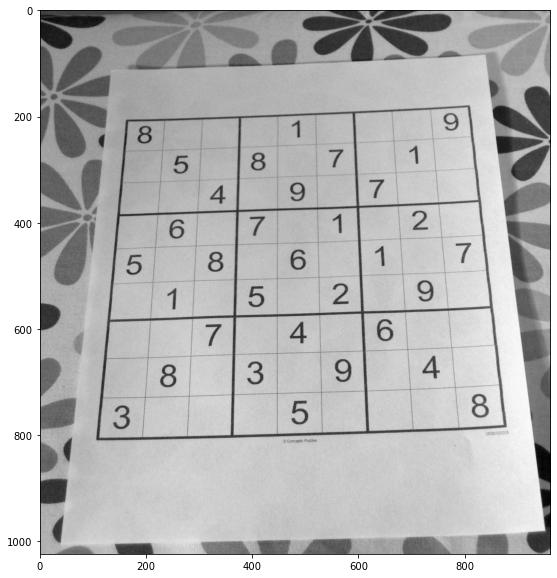

In [4]:
display_img(img)

In [5]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

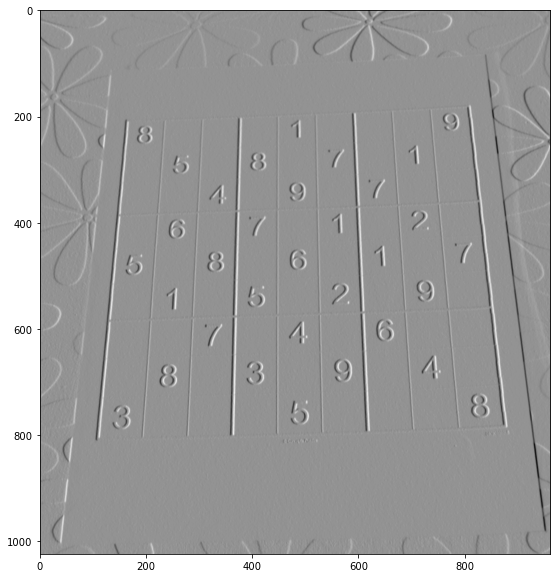

In [6]:
display_img(sobelx)

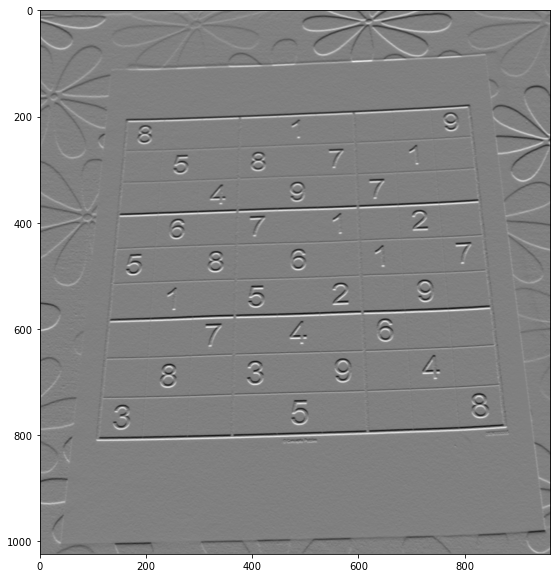

In [7]:
display_img(sobely)

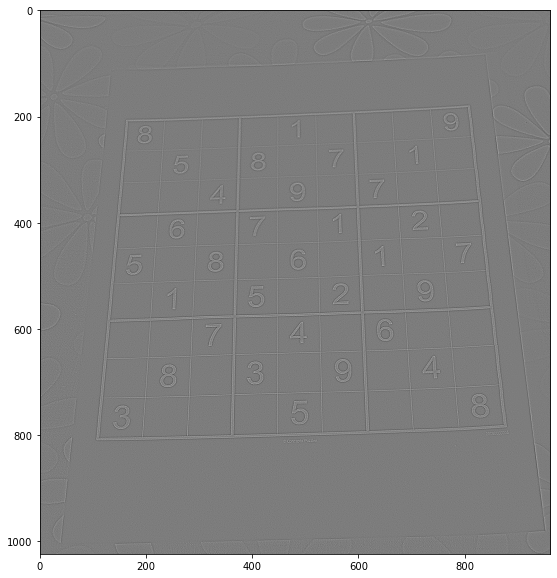

In [8]:
display_img(laplacian)

## Combining Previous Ideas

### Blending Images

In [9]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

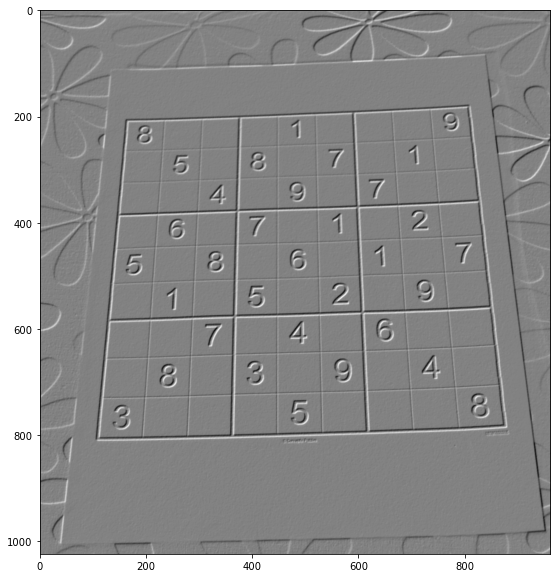

In [10]:
display_img(blended)

In [11]:
blended.shape

(1024, 962)

### Morphological Operators

In [12]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

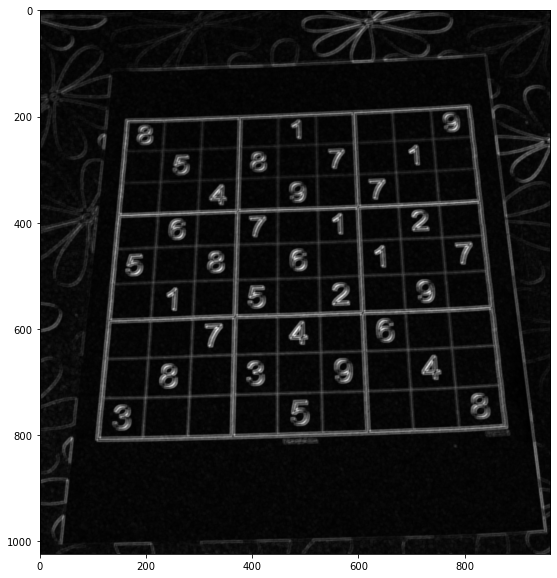

In [13]:
display_img(gradient)

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

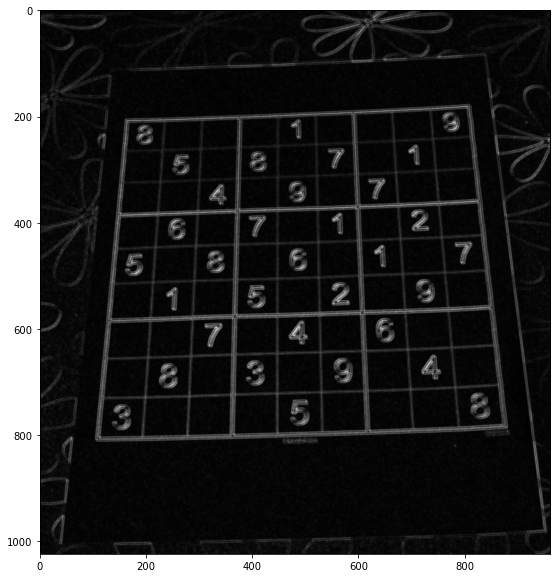

In [15]:
display_img(gradient)

### Thresholds

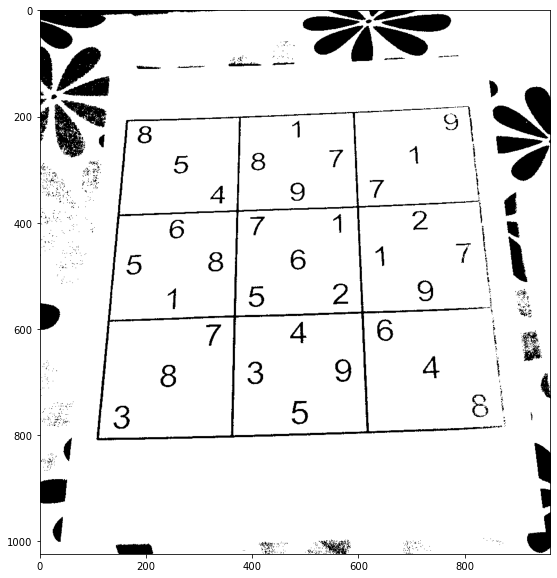

In [16]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

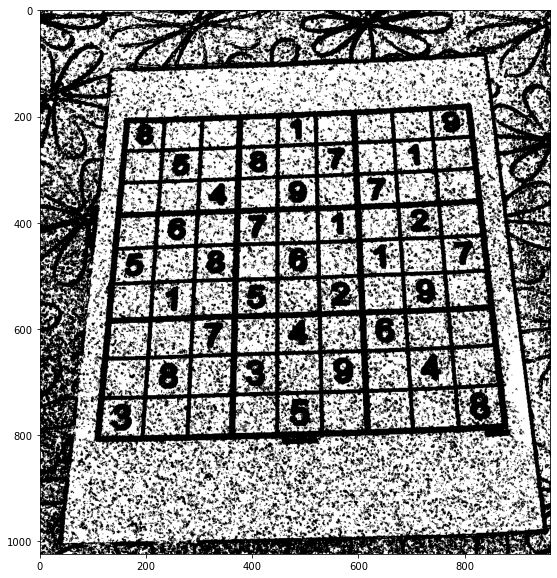

In [17]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

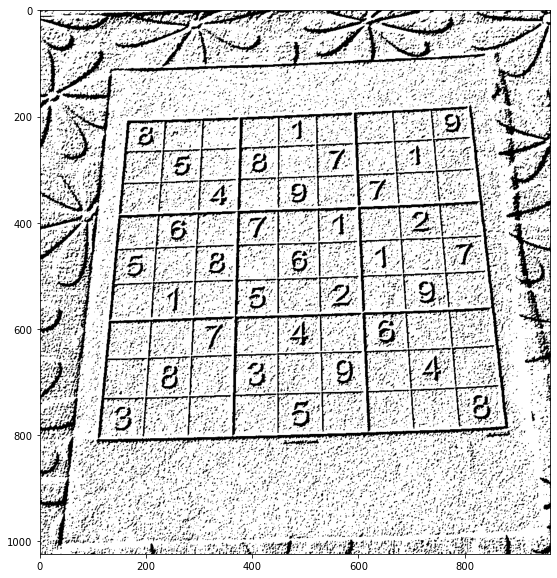

In [18]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)